# IMPORTS

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import cv2
import pandas as pd
from skimage.color import rgb2gray
from PIL import Image
from sklearn.cluster import KMeans
from scipy.ndimage import filters
from scipy.ndimage import binary_fill_holes

# IMAGE PATHS

In [249]:
path = '/Users/hassaanmuzammil/Desktop/SEM 7/Digital Image Processing/'
i2 = 'images.png'
i3 = 'images.jpeg'
i4 = '12345.png'
i5 = '123456.jpeg'
i6 = 'snooker1.jpg'
i7 = 'snooker2.jpg'
i8 = 'snooker3.jpeg'
t1 = 't1.jpg'
t2 = 't2.jpg'
t3 = 't3.jpg'
t4 = 't4.jpg'
t5 = 't5.png'
t6 = 't6.jpg'
t7 = 't7.jpg'

# REGION GROWING - (SEED POINT & THRESHOLD)

In [250]:
import numpy as np
import cv2
 
class Point(object):
    def __init__(self,x,y):
        self.x = x
        self.y = y
 
    def getX(self):
        return self.x
    def getY(self):
        return self.y
 
def getGrayDiff(img,currentPoint,tmpPoint):
    return abs(int(img[currentPoint.x,currentPoint.y]) - int(img[tmpPoint.x,tmpPoint.y]))
 
def selectConnects(p):
    if p != 0:
        connects = [Point(-1, -1), Point(0, -1), Point(1, -1), Point(1, 0), Point(1, 1), \
                    Point(0, 1), Point(-1, 1), Point(-1, 0)]
    else:
        connects = [ Point(0, -1),  Point(1, 0),Point(0, 1), Point(-1, 0)]
    return connects
 
def regionGrow(img,seeds,thresh,p = 1):
    height, weight = img.shape
    seedMark = np.zeros(img.shape)
    seedList = []
    for seed in seeds:
        seedList.append(seed)
    label = 1
    connects = selectConnects(p)
    while(len(seedList)>0):
        currentPoint = seedList.pop(0)
 
        seedMark[currentPoint.x,currentPoint.y] = label
        for i in range(8):
            tmpX = currentPoint.x + connects[i].x
            tmpY = currentPoint.y + connects[i].y
            if tmpX < 0 or tmpY < 0 or tmpX >= height or tmpY >= weight:
                continue
            grayDiff = getGrayDiff(img,currentPoint,Point(tmpX,tmpY))
            if grayDiff < thresh and seedMark[tmpX,tmpY] == 0:
                seedMark[tmpX,tmpY] = label
                seedList.append(Point(tmpX,tmpY))
    return seedMark

# SEGMENTING PLAYABLE AREA 

# REGION GROWING AND REGION FILLING

In [280]:
def segment_playable_area(img_path, seeds, th):
    
    img = plt.imread(img_path)
    img_gray = cv2.imread(img_path,0)
    img_bin = regionGrow(img_gray,seeds,th)
    final_img = binary_fill_holes(img_bin).astype(int)
    
    plt.figure(figsize=(10,10))
    
    plt.subplot(2,2,1)
    plt.imshow(img,cmap='gray')
    plt.title('Original Image')
    
    plt.subplot(2,2,2)
    plt.imshow(img_gray,cmap='gray')
    plt.title('Grayscale Image')
    
    plt.subplot(2,2,3)
    plt.imshow(img_bin,cmap='gray')
    plt.title('Region Growing')
    
    plt.subplot(2,2,4)
    plt.imshow(final_img,cmap='gray')
    plt.title('Region Filling')
    
    plt.suptitle('SEGMENTING PLAYABLE AREA ON POOL TABLE',fontsize=20)
    plt.tight_layout()
    plt.subplots_adjust(left=0.125, bottom=0.4, right=0.9, top=0.925, wspace=0.3, hspace=0.2)
    plt.show()
    
    return final_img

# TEST CASE 1

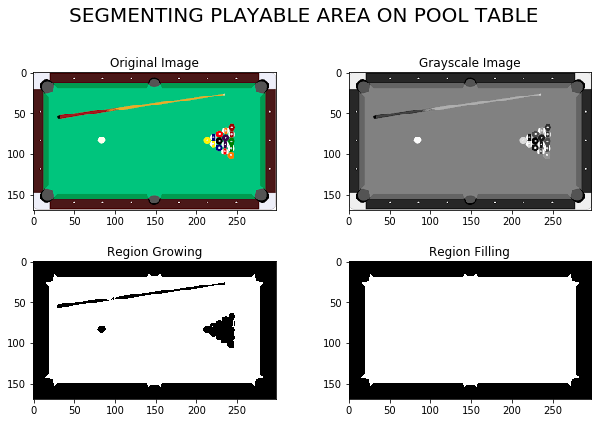

In [252]:
seeds = [Point(100,150)]
final_img = segment_playable_area(path+i2,seeds,10)

# TEST CASE 2

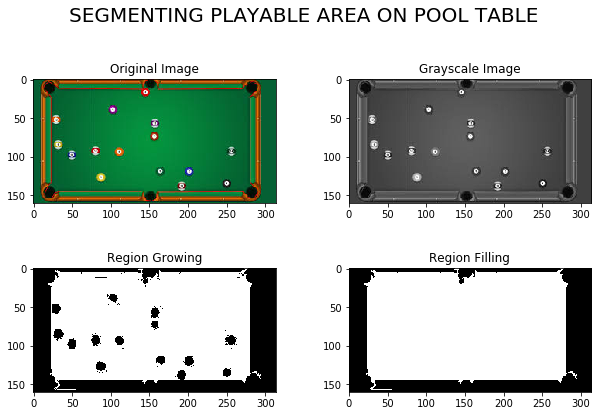

In [253]:
seeds = [Point(50,50),Point(50,250)]
final_img = segment_playable_area(path+i3,seeds,7)

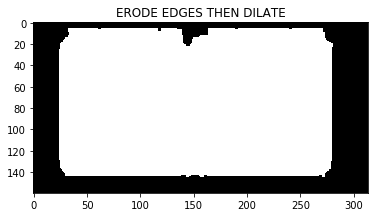

In [254]:
import cv2
import numpy as np
blur=((1,1),1)
erode_=(5,5)
dilate_=(3,3)
im = cv2.dilate(cv2.erode(cv2.GaussianBlur(final_img/255, blur[0], blur[1]), np.ones(erode_)), np.ones(dilate_))*255
plt.imshow(im,cmap='gray')
plt.title('ERODE EDGES THEN DILATE')
plt.show()

# TEST CASE 3

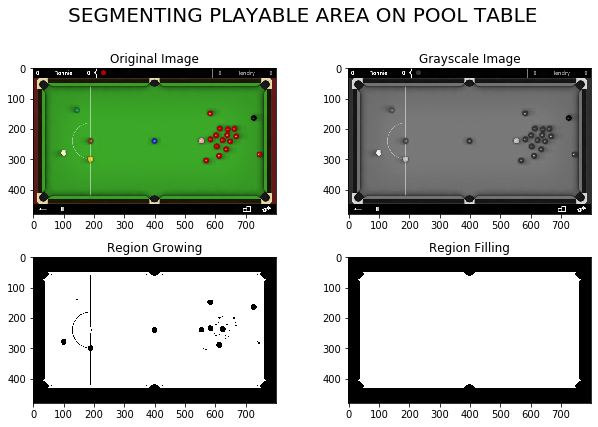

In [255]:
seeds = [Point(200,400),Point(100,150)]
final_img = segment_playable_area(path+i4,seeds,10)

# TEST CASE 4

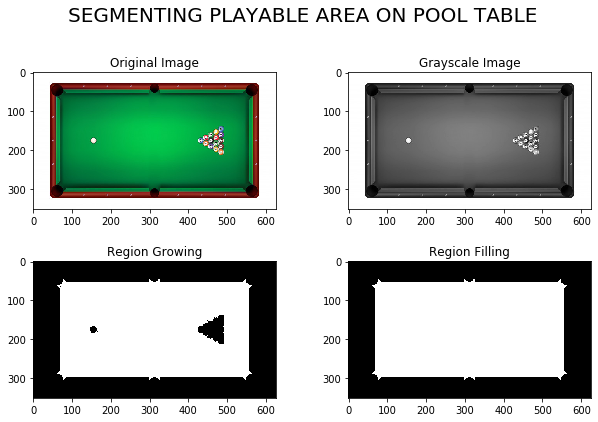

In [256]:
seeds = [Point(200,300)]
final_img = segment_playable_area(path+t2,seeds,5)

# TEST CASE 5

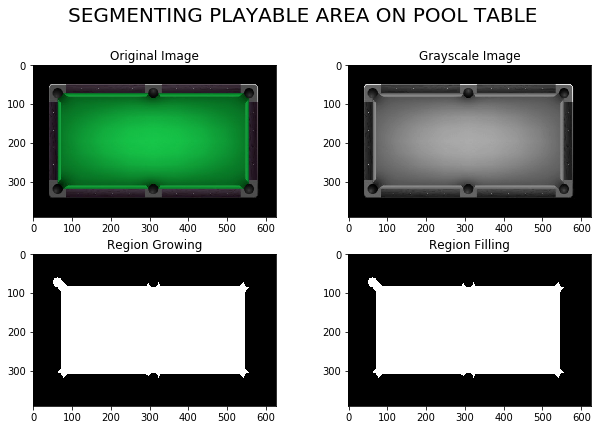

In [257]:
seeds = [Point(300,200)]
final_img = segment_playable_area(path+t1,seeds,4)

# TEST CASE 6

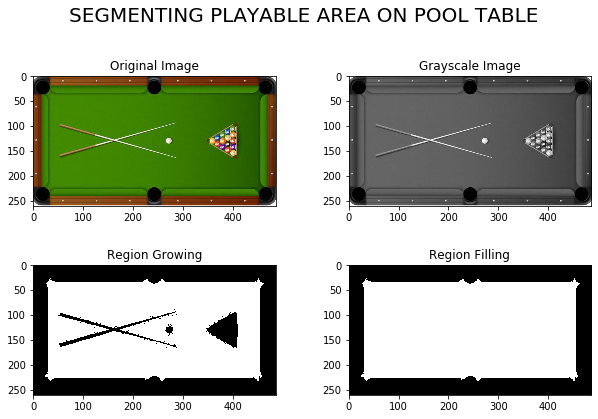

In [258]:
seeds = [Point(200,200)]
final_img = segment_playable_area(path+t3,seeds,4)

# TEST CASE 7

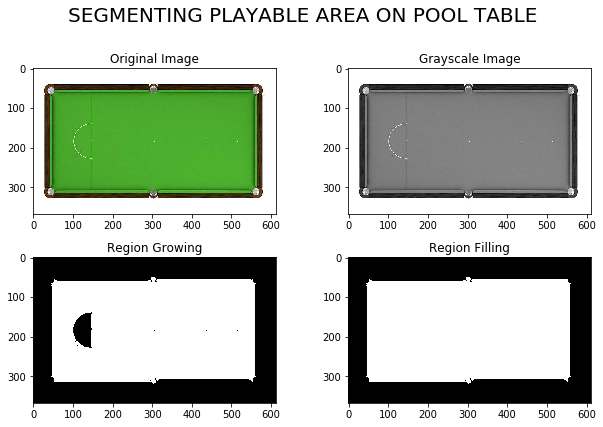

In [274]:
seeds = [Point(300,300)]
final_img = segment_playable_area(path+t4,seeds,12)

# CASE 8

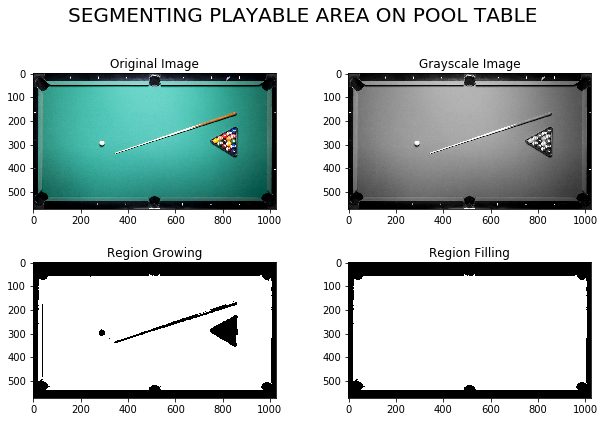

In [279]:
seeds = [Point(200,200)]
final_img = segment_playable_area(path+t6,seeds,6)

# CASE 9

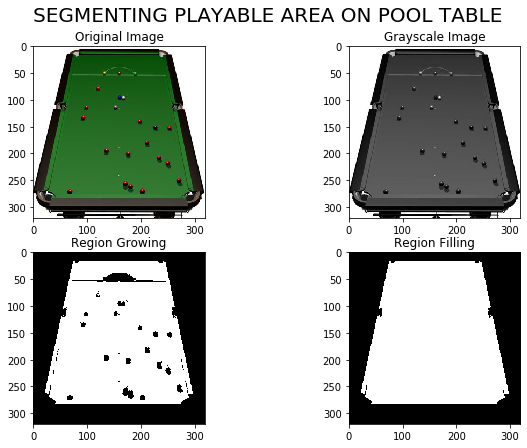

In [281]:
seeds = [Point(200,200)]
final_img = segment_playable_area(path+t7,seeds,8)

# CASE 10

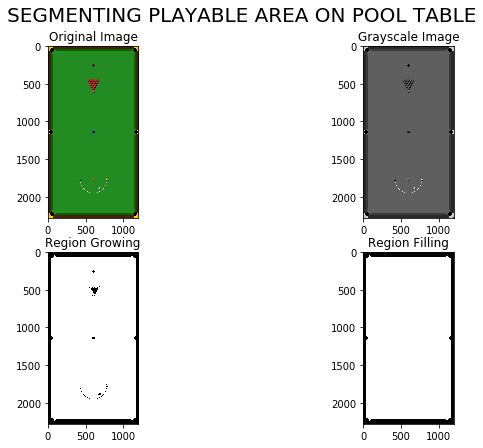

In [286]:
seeds = [Point(200,200),Point(2000,500)]
final_img = segment_playable_area(path+t5,seeds,7)